In [13]:
using Luxor
using PythonCall
using Colors
using Plots
using PlotlyJS
using IterTools
using DataFrames
using OpenStreetMapX
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_prcnt (generic function with 1 method)

In [14]:
points,attr,bounds = calculate_attractiveness_for_city_points(
                                                        "Gdańsk",
                                                        "8",
                                                        1000,
                                                        100,
                                                        :education,
                                                        500)

┌ Info: Read map data from cache Gdańsk.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(ENU[ENU(199.76855895544253, 12.56837241442278, 0.0) ENU(198.58518670359112, 25.08714320486901, 0.0) … ENU(199.76855895544253, -12.56837241442276, 0.0) ENU(200.1635359706701, 1.287550063335195e-13, 0.0); ENU(399.53711791088506, 25.13674482884556, 0.0) ENU(397.17037340718224, 50.17428640973802, 0.0) … ENU(399.53711791088506, -25.13674482884552, 0.0) ENU(400.3270719413402, 2.57510012667039e-13, 0.0); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [2.4488608830659007 2.4305353335553628 … 2.4861188900313587 2.4674065190460936; 2.3192480638351074 2.289722196024818 … 2.3802725304403833 2.3494416413040238; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 2099×5 DataFrame
  Row │ adminname  wayid      nodes       x         y       
      │ String     Int64      Int64       Float64   Float64 
──────┼─────────────────────────────────────────────────────
    1 │ Gdańsk     109612202   595

In [1]:
function to_zero(elem)
    if elem == Inf
        return 0
    end
    return elem
end
to_zero.(abs.(log.(attr)))
#logs = [elem in [for row in abs.(log.(attr))]]


ErrorException: syntax: incomplete: "function" at /home/adamkas/Julia/map_analyses/map_analyses/plot_example.ipynb:1 requires end

In [21]:
plot_heatmap(points,logs,bounds,:education,"Gdańsk",100,1000,500)

In [25]:
points_sec,attr_sec,bounds_sec = calculate_attractiveness_for_city_sectors(
                                                        "Gdańsk",
                                                        "8",
                                                        1000,
                                                        100,
                                                        :education,
                                                        500)

┌ Info: Read map data from cache Gdańsk.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


(ENU[ENU(199.76855895544253, 12.56837241442278, 0.0) ENU(198.58518670359112, 25.08714320486901, 0.0) … ENU(199.76855895544253, -12.56837241442276, 0.0) ENU(200.1635359706701, 1.287550063335195e-13, 0.0); ENU(399.53711791088506, 25.13674482884556, 0.0) ENU(397.17037340718224, 50.17428640973802, 0.0) … ENU(399.53711791088506, -25.13674482884552, 0.0) ENU(400.3270719413402, 2.57510012667039e-13, 0.0); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [0.04683742122158847, 0.027052302257431795, 0.023869505692707897, 0.017658834549846205, 0.014642807158278386, 0.01440058341002107, 0.0160851497111235, 0.022258795646511627, 0.028770024956239506, 0.035206626537364775  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2099×5 DataFrame
  Row │ adminname  wayid      nodes       x         y       
      │ String     Int64      Int64       Float64   Float64 
──────┼──────────────────

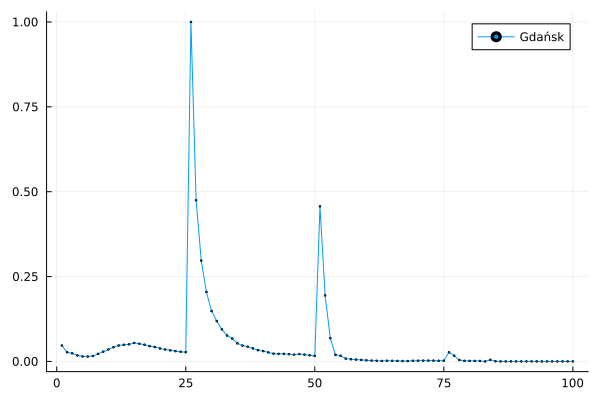

In [26]:
plotconfig = (marker=:circle, markersize=1)
plot_attractiveness_of_sectors_prcnt(attr_sec,"Gdańsk",plotconfig)